In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Bayesian Central Limit Theorem Approximation

Chapter 3.1.3: Bayesian Central Limit Theorem (CLT)

The model is $Y \mid \theta \sim \mbox{Binomial}(n,\theta)$
and $\theta \sim \mbox{Beta}\left(\frac{1}{2}, \frac{1}{2}\right)$. The exact posterior is $\theta \mid Y \sim \mbox{Beta}\left(Y + \frac{1}{2},n + \frac{1}{2} \right)$. Below we compare the exact posterior with a Gaussian approximation to the posterior for small, medium, and large datasets (as determined by $n$).

The Gaussian approximation is centered around the maximum a posteriori (MAP) estimate ${\hat \theta} = \frac{A}{(A+B)}$
where $A=Y-\frac{1}{2}$ and $B=n-Y-\frac{1}{2}$. This is found by taking the derivative of the log posterior with respect to $\theta$, setting it to zero, and solving for $\theta$. The posterior variance is approximated as $\left(\frac{A}{{\hat \theta}^2} + \frac{B}{(1-{\hat \theta})^2}\right)^{-1}$. This is a function of the second derivative of the log posterior evaluated at $\hat \theta$.

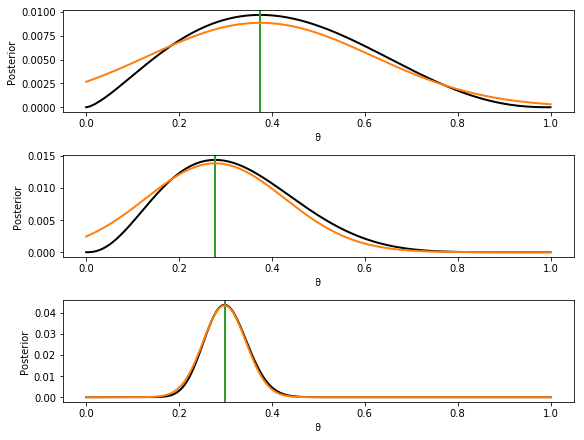

In [2]:
θ = np.linspace(0.0001, 0.9999, 200)

_, ax = plt.subplots(3, 1, constrained_layout=True, figsize=(8, 6))

for i, (Y, n) in enumerate([(2, 5), (3, 10), (30, 100)]):
    A = Y - 0.5
    B = n - Y - 0.5
    θ_MAP = A/(A+B)
    info = A/θ_MAP**2+B/(1-θ_MAP)**2

    post1 = stats.binom(n, θ).pmf(Y) * stats.beta(0.5, 0.5).pdf(θ)
    post1 = post1 / np.sum(post1)
    post2 = stats.norm(θ_MAP, (1/info)**0.5).pdf(θ)
    post2 = post2/sum(post2)

    ax[i].plot(θ, post1, 'k', lw=2, label='Exact')
    ax[i].axvline(θ_MAP, color='C2', lw=2, label='MAP')
    ax[i].plot(θ, post2, 'C1', lw=2, label='CLT')
    ax[i].set_xlabel('θ')
    ax[i].set_ylabel('Posterior')